In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
os.getcwd()

'c:\\Users\\HP\\Documents\\SBP'

In [4]:
dataRem = pd.read_csv("USARemittanceMonthly.csv")
print(dataRem.shape)
print(dataRem.columns)

(612, 6)
Index(['Series Key', 'Series', 'Observation Date', 'Observation Value', 'Unit',
       'Observation Status'],
      dtype='object')


In [5]:
dataRem['Observation Date'] = pd.to_datetime(dataRem['Observation Date'], format='%m/%d/%Y')

In [6]:
dataRem['Day'] = dataRem['Observation Date'].dt.day
dataRem['Month'] = dataRem['Observation Date'].dt.month
dataRem['Year'] = dataRem['Observation Date'].dt.year

In [44]:
#dataRem.drop('Observation Date', axis=1, inplace=True)

In [7]:
dataRem.dtypes

Series Key                    object
Series                        object
Observation Date      datetime64[ns]
Observation Value            float64
Unit                          object
Observation Status            object
Day                            int32
Month                          int32
Year                           int32
dtype: object

In [8]:
dataRem.head(10)
dataRem.tail()
display(dataRem)

,Series Key,Series,Observation Date,Observation Value,Unit,Observation Status,Day,Month,Year
0,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,2023-06-30,272.285824,Million USD,Normal,30,6,2023
1,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,2023-05-31,257.265148,Million USD,Normal,31,5,2023
2,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,2023-04-30,271.851614,Million USD,Normal,30,4,2023
3,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,2023-03-31,315.241035,Million USD,Normal,31,3,2023
4,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,2023-02-28,219.842073,Million USD,Normal,28,2,2023
...,...,...,...,...,...,...,...,...,...
607,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,1972-11-30,0.700000,Million USD,Normal,30,11,1972
608,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,1972-10-31,0.800000,Million USD,Normal,31,10,1972
609,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,1972-09-30,0.700000,Million USD,Normal,30,9,1972
610,TS_GP_BOP_WR_M.WR0020,Worker Remittance - USA,1972-08-31,0.800000,Million USD,Normal,31,8,1972


In [9]:
dataRem.dropna(inplace=True)

In [10]:
import matplotlib.pyplot as plt

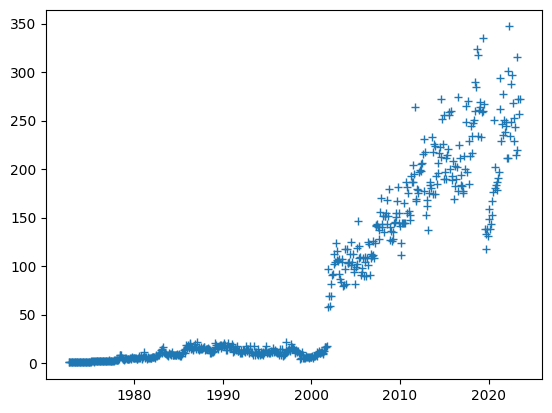

In [11]:
plt.plot( dataRem['Observation Date'], dataRem['Observation Value'],'+')

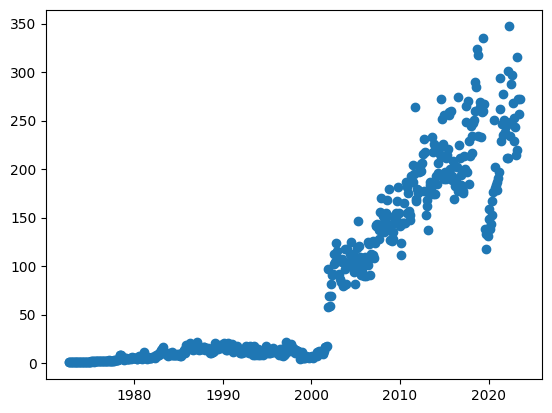

In [12]:
plt.plot(dataRem['Observation Date'],dataRem['Observation Value'],'o')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X_categorical = dataRem[['Day', 'Month', 'Year']]
y = dataRem['Observation Value']

In [15]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_categorical)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
regRem = LinearRegression().fit(X_encoded, y)

print(regRem.score(X_encoded, y))  # R-squared value (coefficient of determination)
print(regRem.coef_)  # Coefficients of the features
print(regRem.intercept_)

0.9604317947547301
[ 1.28966769e+15  1.28966769e+15  6.39925212e+14  5.55331356e+14
 -1.42579934e+15 -2.16013567e+15 -1.42579934e+15 -1.51039320e+15
 -1.42579934e+15 -1.51039320e+15 -1.42579934e+15 -1.42579934e+15
 -1.51039320e+15 -1.42579934e+15 -1.51039320e+15 -1.42579934e+15
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27276262e+14  8.27276262e+14  8.27276262e+14  8.27276262e+14
  8.27

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

#new_data = pd.DataFrame({'Day': [30], 'Month': [3], 'Year': [2024]})

#new_data_encoded = encoder.transform(new_data)
#predictions = regRem.predict(new_data_encoded)

# Print the predicted values
#print(predictions)
#print("Mean squared error: %.2f" % mean_squared_error(y, predictions))

ValueError: Found unknown categories [2024] in column 2 during transform

In [33]:
y_pred = regRem.predict(X_encoded)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 331.12
Coefficient of determination: 0.96


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3)
regRem2 = LinearRegression().fit(X_train, y_train)
print(regRem2.score(X_train, y_train))
print(regRem2.coef_)
print(regRem2.intercept_)
y_pred_test = regRem2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

0.9652695573675902
[-2.68129667e+15 -2.68129667e+15 -6.56309061e+14 -1.03105916e+15
  6.47147783e+13  1.71495229e+15  6.47147783e+13 -3.10035322e+14
  6.47147783e+13 -3.10035322e+14  6.47147783e+13  6.47147783e+13
 -3.10035322e+14  6.47147783e+13 -3.10035322e+14  6.47147783e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35581097e+13  3.35581097e+13  3.35581097e+13  3.35581097e+13
  3.35

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

In [39]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
sfs.fit(X_encoded, y)
print(sfs.get_feature_names_out())

['x58' 'x61' 'x62' 'x65' 'x66']


In [41]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='backward',n_features_to_select=5)
sfs.fit(X_encoded, y)
print(sfs.get_feature_names_out())

['x54' 'x58' 'x59' 'x61' 'x63']


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn import tree

In [43]:
regTree = DecisionTreeRegressor(max_depth=10,random_state=0)
regTree.fit(X_train, y_train)
y_pred = regTree.predict(X_test)
print("DT: R2 = %.4f and MSE = %.2f" % (regTree.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

DT: R2 = 0.5884 and MSE = 3514.77


In [44]:
regRF = RandomForestRegressor(max_depth=6, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regRF.fit(X_train, y_train)
y_pred = regRF.predict(X_test)
print("RF: R2 = %.4f and MSE = %.2f" % (regRF.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

RF: R2 = 0.3099 and MSE = 5894.03


In [45]:
regGB = GradientBoostingRegressor(max_depth=10, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regGB.fit(X_train, y_train)
y_pred = regGB.predict(X_test)
print("GB: R2 = %.4f and MSE = %.2f" % (regGB.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

GB: R2 = 0.9480 and MSE = 444.10


In [48]:
regP = PoissonRegressor(alpha=1.0, fit_intercept=True, solver='lbfgs', max_iter=100, tol=0.0001, warm_start=False, verbose=0)
regP.fit(X_train, y_train)
y_pred = regP.predict(X_test)
print("Poisson: R2 = %.4f and MSE = %.2f" % (regP.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

Poisson: R2 = 0.7222 and MSE = 2094.19


In [35]:
import lazypredict


In [37]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 69%|██████▉   | 29/42 [00:05<00:02,  5.45it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:07<00:00,  5.37it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 15
[LightGBM] [Info] Start training from score 79.686068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: